<img src="images/kiksmeisedwengougent.png" alt="Banner" width="1100"/>

<div>
    <font color=#690027 markdown="1"> 
```html
<h1>SEA LEVEL IN OSTEND - ML REGRESSION</h1>
```    </font>
</div>

<div class="alert alert-box alert-success">
This notebook predicts future sea levels in Ostend by using <em>regression</em>.<br>For this, a technique from <em>machine learning</em> is applied. Typical for this approach is that the data are split into <em>training data and test data</em>. The data are also always <em>standardized</em>. The accuracy of the system's predictions will be examined using the test data. <br>The functionalities of the Python module <em>scikit-learn</em> are being used. <br>The phenomenon <em>overfitting</em> is illustrated.</div>

<div class="alert alert-box alert-warning">
This notebook follows the notebook 'Sea Level in Ostend - Regression'.</div>

Sea level is affected by the increase in the volume of the water mass as temperature rises, melting ice caps and glaciers, the changing storage of surface water and groundwater. Global climate change will lead to a sea level rise of 18 to 59 cm [1] within this century.<br>
**We examine the evolution of sea level on the Belgian coast since 1951. Ostend is the measuring point on our coast with the longest uninterrupted series of measurements.**

The height of a point is measured with respect to sea level. <br>The sea level, however, is not always at the same height. Tides cause a difference that amounts to about four meters at the Belgian coast. <br>Therefore, a reference point is needed. The average sea level at low tide in Ostend is used as the zero level: the Second General Water Leveling (TAW). In the Netherlands, the average sea level between low and high tide is used: the Normal Amsterdam Level (NAP). The TAW reference point is 2.33 meters below the NAP reference point. To compare national height measurements with each other, one must take into account the different reference points [2].<br><br>**Sea level is expressed in mm RLR (Revised Local Reference); data relative to the local reference is converted to data relative to the international reference level.**

Sea level measurements in Ostend have been taken since 1951. The values of these measurements can be found on the website of the Flemish Environment Agency [3]. <br><br>For this notebook, the data are available in the `sealevel.csv` file in the `data` directory. <br>The data include the annual average sea level (in mm RLR) in Ostend for a given year and the year itself.

### Assignment- Visualize the data from the csv file (also see the previous notebook).<br>Set the range of the axes so that there is room for a 'glimpse into the future'.- The scatter plot shows a trend. If you were to represent this trend with a straight line, how could you describe the relationship between x and y?- Determine the equation of a straight line as a trendline.- Draw them on the graph.
### Expansion- Investigate whether you find a curve as a regression line that is better suited as a trend line than a straight one.- The annual average sea level measured in 2018 and 2019 is, respectively, 7067 and 7129 mm RLR [4]. Are these values predicted by the regression lines found?

## Example solution

### Import necessary modules

In [1]:
# example scriptimport pandas as pdimport matplotlib.pyplot as pltimport numpy as npfrom scipy.optimize import curve_fit
from sklearn.metrics import r2_scorefrom sklearn.metrics import mean_squared_error

<div>
    <font color=#690027 markdown="1"> 
```
<h2>1. Reading the data</h2>
```    </font>
</div>

Sea levels in Ostend have been measured since 1951. The values from these measurements can be found on the website of the Flemish Environment Agency [3].

In [2]:
# example scriptsea_level = pd.read_csv("data/sea_level.csv", header=None) # the table to be read has no header

<div>
    <font color=#690027 markdown="1"> 
        <h2>2. Point Cloud</h2> 
    </font>
</div>

In [3]:
# Example scriptx = sea_level[0]   y = sea_level[1]The input text provided does not contain Dutch language that needs to be translated to English. It's a line of Python code with no comments or text that requires translation. Therefore, the input remains the same:

```python
x = np.array(x)
```y = np.array(y)

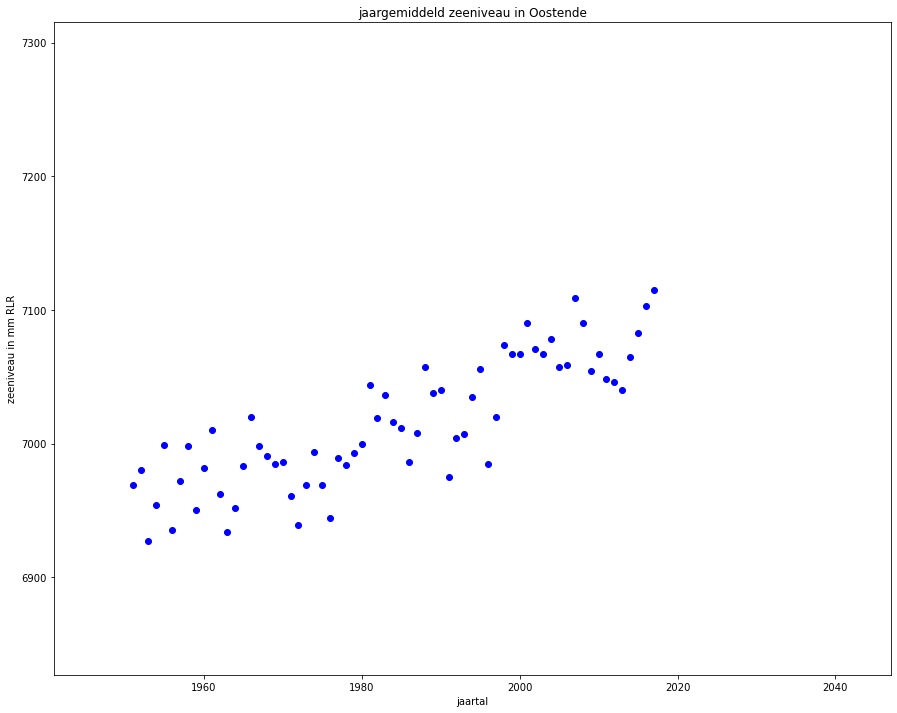

In [4]:
# example scriptplt.figure(figsize=(15,12))     
# choose range to ensure suitability for future outlookplt.xlim(x.min()-10, x.max()+30)plt.ylim(y.min()-100, y.max()+200)plt.title("annual average sea level in Ostend")plt.xlabel("year")plt.ylabel("sea level in mm RLR")
plt.scatter(x, y, color="blue", marker="o")
plt.show()

In [5]:
# example scriptnp.corrcoef(x, y)[0,1]

0.8380931683825255

Interpretation: One can speak of a strong and positive linear correlation.

### A straight line as a regression line

<div>
    <font color=#690027 markdown="1"> 
        <h2>3. Training Data and Test Data</h2> 
    </font>
</div>

<div>
    <font color=#690027 markdown="1"> 
        <h3>3.1 Splitting the data</h3> 
    </font>
</div>

The data are split into training data and test data.<br><br> *The training data are used to establish a mathematical model. <br>The test data is used to check if the model handles new data well.*

In [6]:
# Prepare the data
# trainingdatax_train = x[0:57]y_train = y[0:57]print(x_train)print(y_train)
# testdatax_test = x[57:]y_test = y[57:]print(x_test)print(y_test)

[1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007]
[6969 6980 6927 6954 6999 6935 6972 6998 6950 6982 7010 6962 6934 6952
 6983 7020 6998 6991 6985 6986 6961 6939 6969 6994 6969 6944 6989 6984
 6993 7000 7044 7019 7036 7016 7012 6986 7008 7057 7038 7040 6975 7004
 7007 7035 7056 6985 7020 7074 7067 7067 7090 7071 7067 7078 7057 7059
 7109]
[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
[7090 7054 7067 7048 7046 7040 7065 7083 7103 7115]


<div>
    <font color=#690027 markdown="1"> 
```html
<h3>3.2 Standardization</h3>
```    </font>
</div>

The data are **standardized** as follows: the mean is subtracted from each datum in the training data, and then the result is divided by the standard deviation. In other words, the Z-score is calculated for all the training data. <br> This way, most of the data falls between -1 and 1. <br>**Note that the entire dataset is standardized in the same way.** The test data is treated in exactly the same manner: the mean and standard deviation of the **training data** are also used. <br><br>
Working with quite large numbers can quickly lead to even larger numbers and to numerical instability, that is one of the reasons why the data are standardized. Standardization of variables involves scaling the variables in such a way that one can compare or associate variables of e.g. a different order of magnitude or in a different unit with each other. The correlation between bivariate data e.g., can be visually estimated by looking at the corresponding scatter plot. However, the shape of this is only reliable if the data are standardized. Also, some algorithms from machine learning are only usable when the data are standardized, because those algorithms are designed that way.<br>

In [7]:
# determine the average and standard deviation of the training datax_train_gem = np.mean(x_train)x_train_std = np.std(x_train)y_train_gem = np.mean(y_train)y_train_std = np.std(y_train)
# standardize training datax_train = (x_train - x_train_gem) / x_train_stdy_train = (y_train - y_train_mean) / y_train_stdprint(x_train)print(y_train)print(x_train.shape, y_train.shape)
Sure, however, you haven't provided any text with HTML, markdown, or Python syntax accompanied by Dutch that needs to be translated to English. If you provide me with the specific content, I'll be able to assist you with the translation.x_test = (x_test - x_train_gem ) / x_train_stdy_test = (y_test - y_train_gem) / y_train_stdprint(x_test)print(y_test)print(x_test.shape, y_test.shape)

[-1.70192589 -1.64114282 -1.58035975 -1.51957668 -1.45879362 -1.39801055
 -1.33722748 -1.27644442 -1.21566135 -1.15487828 -1.09409521 -1.03331215
 -0.97252908 -0.91174601 -0.85096294 -0.79017988 -0.72939681 -0.66861374
 -0.60783067 -0.54704761 -0.48626454 -0.42548147 -0.3646984  -0.30391534
 -0.24313227 -0.1823492  -0.12156613 -0.06078307  0.          0.06078307
  0.12156613  0.1823492   0.24313227  0.30391534  0.3646984   0.42548147
  0.48626454  0.54704761  0.60783067  0.66861374  0.72939681  0.79017988
  0.85096294  0.91174601  0.97252908  1.03331215  1.09409521  1.15487828
  1.21566135  1.27644442  1.33722748  1.39801055  1.45879362  1.51957668
  1.58035975  1.64114282  1.70192589]
[-0.83487601 -0.58235925 -1.79903095 -1.17921706 -0.14619392 -1.61538239
 -0.7660078  -0.16914999 -1.27104134 -0.53644711  0.10632285 -0.9955685
 -1.63833846 -1.2251292  -0.51349104  0.33588355 -0.16914999 -0.32984248
 -0.4675789  -0.44462283 -1.01852457 -1.52355811 -0.83487601 -0.26097427
 -0.83487601 -

<div>
    <font color=#690027 markdown="1"> 
```html
<h2>4. Regression</h2>
```    </font>
</div>

*Regression* is about finding the best fitting straight or curved line through given points.<br>The best fitting straight or *regression line* can be found directly using formulas from mathematics, but here we apply a technique from machine learning.<br>We apply the same technique to find a best-fitting curve. The curves used are graphs of polynomial functions of different degrees. <br>

The discovered curve is not always a perfect fit. There is an error in it. <br>This error can be determined by, for example, *calculating the root mean square error*.<br> The mentioned deviation is the difference between the predicted and the actual y-coordinate of a point. <br><br>With every regression curve, there is a corresponding error. In machine learning, one speaks of a *cost function*. <br>One wants to minimize this cost function: in other words, one is looking for the regression curve with the smallest error. In this process, one must ensure that the model generalizes well and thus handles new data effectively; the model should not overfit.

<div>
    <font color=#690027 markdown="1"> 
        <h3>4.1 Linear regression: line</h3>
    </font>
</div>

In [8]:
# example script
def straight_line(x, a, b):"""Prescription (inclined) straight line with variable x and coefficients a and b."""return a * x + b
def linreg(x, y):"""Rights best suited for data x and y."""popt, pcov = curve_fit(rechte, x, y)a, b = popt                     # coefficients```python
print("y = ", a, " x +", b)
```return a, b

In [9]:
# example script# trend line for given data sea levela, b = linreg(x_train, y_train)

y =  0.7942668905003423  x + 8.314617883087294e-10


Answer: the equation of the regression line is (rounded) $y=0.79x$.

In [10]:
# example script# points to show trend linex_extra = np.arange(1951, 2070, 10)      # Choose x-values further into the futurex_extra = (x_extra - x_train_gem) / x_train_std
y_regression_line_straight = straight(x_train, a, b)  # regression on training datay_trendline = rechte(x_extra, a, b)      # extend the straight liney_predicted = rechte(x_test, a, b)       # Predict y-values for test data (to compare with y_test)

R² voor de rechte m.b.t. de trainingdata: 0.631
Gemiddelde kwadratische afwijking voor de rechte m.b.t. de trainingdata: 0.37
Gemiddelde kwadratische afwijking voor de rechte m.b.t. de testdata: 0.27


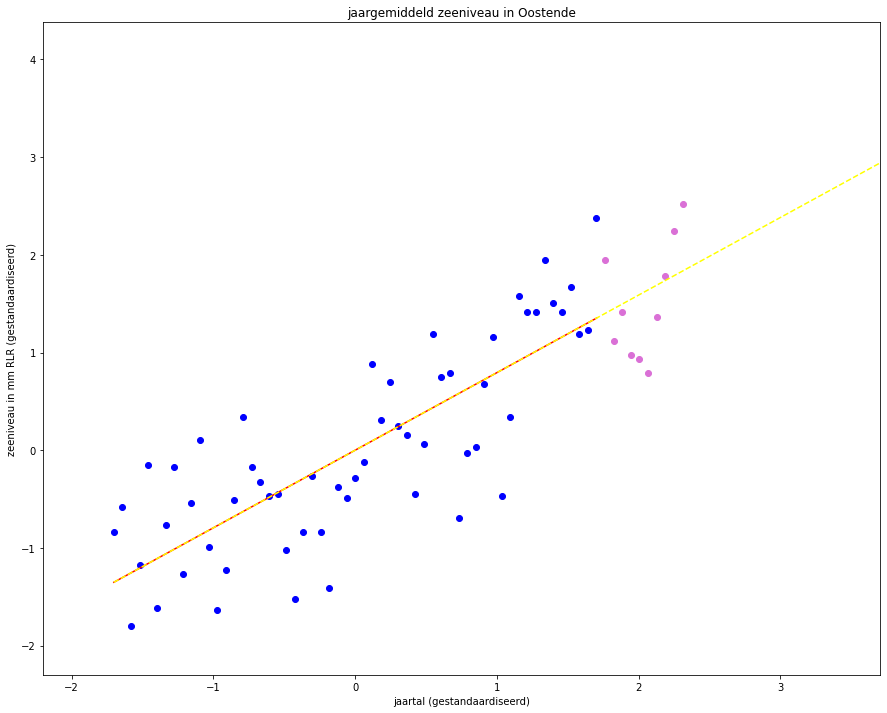

In [12]:
plt.figure(figsize=(15,12))plt.xlim(x_train.min()-0.5, x_train.max()+2)plt.ylim(y_train.min()-0.5, y_train.max()+2)
# point cloud traindataplt.scatter(x_train, y_train, color="blue", marker="o")plt.title("Annual mean sea level in Ostend")plt.xlabel("year (standardized)")plt.ylabel("sea level in mm RLR (standardized)")
# regression lineplt.plot(x_train, y_regression_line_straight, color="red")plt.plot(x_extra, y_trendlijn, color="yellow", linestyle="dashed")```python
print("R² for the line w.r.t. the training data: %.3f" % r2_score(y_train, y_regressionline_straight))
```print("Mean squared deviation for the line w.r.t. the training data: %.2f"% mean_squared_error(y_train, y_regressielijn_rechte))```python
print("Mean squared deviation for the line w.r.t the test data: %.2f"% mean_squared_error(y_test, y_predicted))
```
# point cloud test dataplt.scatter(x_test, y_test, color="orchid", marker="o")
plt.show()

Interpretation: the mean squared deviation for the line with respect to the training data is 0.37 and the mean squared deviation for the line with respect to the test data is 0.27. This error is smaller, indicating good generalization. The line even fits the test data better than the training data.The R² for the line with respect to the training data is 0.631. (The closer the determination coefficient R² is to 1, the better the model fits the training data.)

### Expansion

<div>
    <font color=#690027 markdown="1"> 
```html
<h3>4.2 Quadratic Regression: Parabola</h3>
```    </font>
</div>

In [13]:
# example scriptdef parabole(x, a, b, c):"""Equation of a parabola with parameters a, b, and c."""```python
# This line of code represents a quadratic function in standard form: f(x) = ax^2 + bx + c
return a * x**2 + b * x + c
```
def kwadreg(x, y):popt, pcov = curve_fit(parabola, x, y)a2, b2, c2 = popt```python
print("y = ", a2, "x² +", b2, "x +", c2) # translates to: print("y = ", a2, "x² +", b2, "x +", c2)
```return a2, b2, c2

In [14]:
# example scripta2, b2, c2 = quadreg(x_train, y_train)  # Quadratic regression

y =  0.24806927805443668 x² + 0.7942668898751336 x + -0.24806927823681324


Answer: the equation of the regression line is (rounded) $y=0.25 x² + 0.79 x -0.25$.

In [16]:
# example script# points to display trendline can be used from above# x_extra = np.arange(1951, 2070, 10)      # Choose x-values further into the future# x_extra = (x_extra - x_train_mean) / x_train_std
y_regressielijn_parabool = parabool(x_train, a2, b2, c2)  # regression on train datay_trendline = parabool(x_extra, a2, b2, c2)      # extend the liney_predicted = parabool(x_test, a2, b2, c2)       # Predict y-values for test data (to compare with y_test)

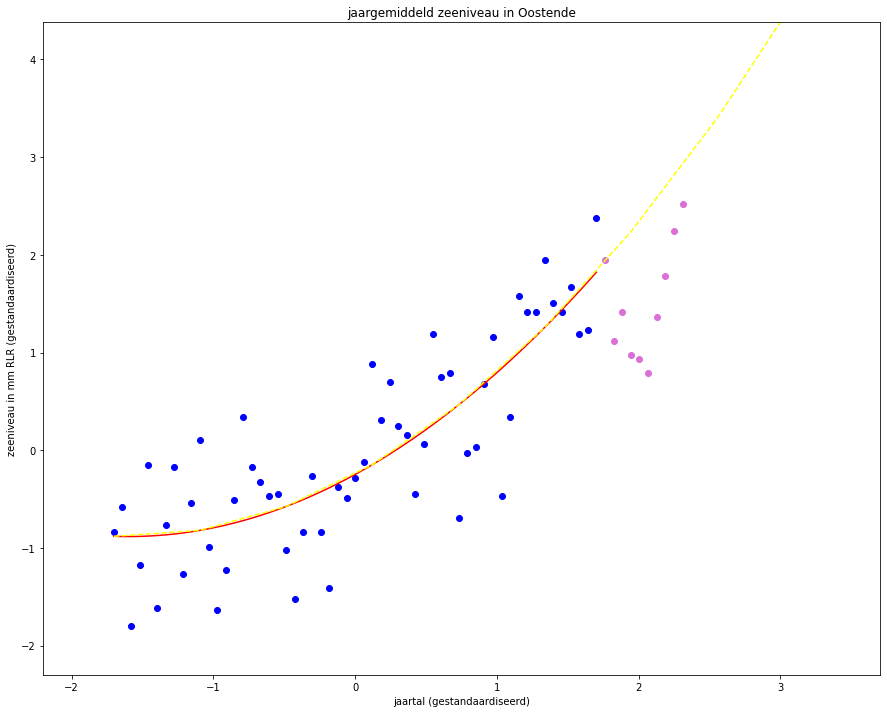

In [18]:
plt.figure(figsize=(15,12))plt.xlim(x_train.min()-0.5, x_train.max()+2)plt.ylim(y_train.min()-0.5, y_train.max()+2)
# point cloud traindataplt.scatter(x_train, y_train, color="blue", marker="o")plt.title("annual average sea level in Ostend")plt.xlabel("year (standardized)")plt.ylabel("sea level in mm RLR (standardized)")
# quadratic regression lineplt.plot(x_train, y_regressielijn_parabool, color="red")plt.plot(x_extra, y_trendlijn, color="yellow", linestyle="dashed")
# point cloud test dataplt.scatter(x_test, y_test, color="orchid", marker="o")
plt.show()

In [20]:
print("R² for the parabola w.r.t. the training data: %.3f" % r2_score(y_train, y_regression_line_parabola))print("Mean Squared Error for the parabola with respect to the training data: %.2f" % mean_squared_error(y_train, y_regression_line_parabola))print("Mean squared deviation for the parabola with respect to the test data: %.2f"% mean_squared_error(y_test, y_predicted))

R² voor de parabool m.b.t. de trainingdata: 0.680
Gemiddelde kwadratische afwijking voor de parabool m.b.t. de trainingdata: 0.32
Gemiddelde kwadratische afwijking voor de parabool m.b.t. de testdata: 1.03


**The parabola fits the training data slightly better compared to the straight line, but not as well with the test data.**<br>(The smaller the root mean square deviation, the better.)

<div>
    <font color=#690027 markdown="1"> 
        <h3>4.3 Cubic Curve</h3> 
    </font>
</div>

In [21]:
The given text is the signature of a Python function written in Dutch, containing a function name and parameter names. The text doesn't form a coherent sentence that requires translation as it's primarily code with variable names. The function name 'derdegr' is abbreviated from 'derde graad', which translates to 'third degree', presumably for a third degree polynomial. However, variable names typically are not translated as they are part of the code, unless they form full Dutch words with a different meaning in English.

If you still require the variable names to be translated, here's a possible translation:
- a, b, c, d - These are common mathematical variable names and may not have a meaningful translation as they typically represent coefficients in a polynomial.
- x is the independent variable and does not need translation.

If 'x, a, b, c, d' are intended as Dutch words and not variable names, please provide additional context for an accurate translation. Otherwise, the input remains the same as no English text requiring translation is present."""Prescription of a third-degree polynomial function with parameters a, b, c, and d."""    return a * x**3 + b * x**2 + c * x + d
def derdegraadsreg(x, y):popt, pcov = curve_fit(derdegr, x, y)a3, b3, c3, d3 = popt```python
print("y = ", a3, " x³  +", b3, "x² +", c3, "x +", d3)
```return a3, b3, c3, d3

In [22]:
a3, b3, c3, d3 = third_degree_regression(x_train, y_train)

y =  0.04084180055050257  x³  + 0.24806927410872015 x² + 0.7207818231030421 x + -0.24806927461838613


Answer: the equation of the regression line is (rounded) $y= 0.04 x³ + 0.25 x² + 0.72 x - 0.25$.

In [23]:
# example script# points to show trendline can be used from above```python
# x_extra = np.arange(1951, 2070, 10)      # Choose x-values further into the future
```# x_extra = (x_extra - x_train_gem) / x_train_std
y_regressionline_cubic = cubic(x_train, a3, b3, c3, d3)  # regression on train datay_trendline = derdegr(x_extra, a3, b3, c3, d3)      # continue the liney_predicted = third_deg(x_test, a3, b3, c3, d3)       # predict y-values for test data (to compare with y_test)

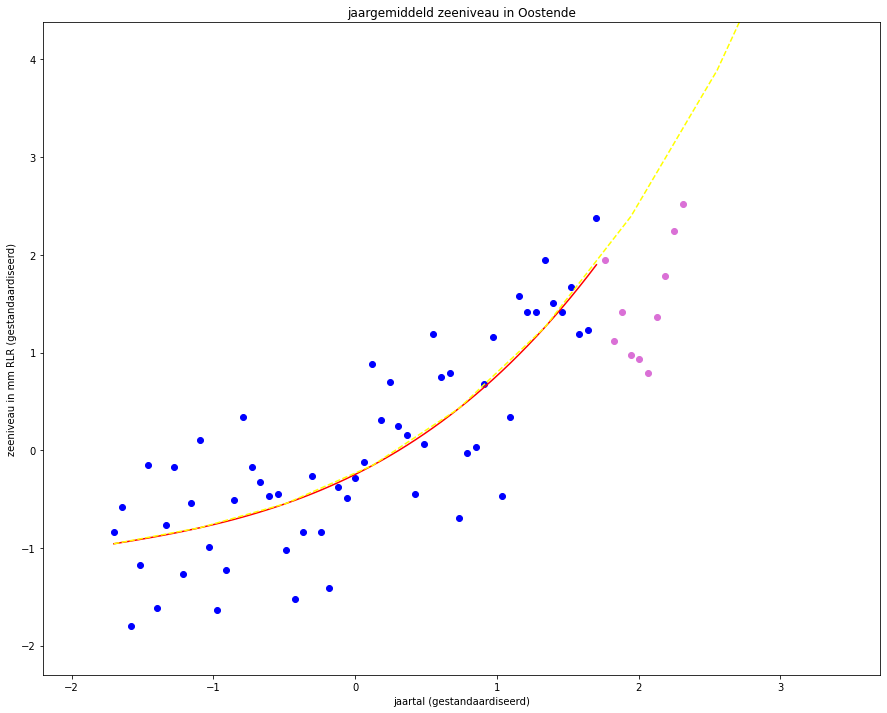

In [26]:
plt.figure(figsize=(15,12))plt.xlim(x_train.min()-0.5, x_train.max()+2)plt.ylim(y_train.min()-0.5, y_train.max()+2)
# point cloud traindataplt.scatter(x_train, y_train, color="blue", marker="o")plt.title("annual average sea level in Ostend")plt.xlabel("year (standardized)")plt.ylabel("sea level in mm RLR (standardized)")
# regression with third-degree curveplt.plot(x_train, y_regression_line_third_degree, color="red")plt.plot(x_extra, y_trendlijn, color="yellow", linestyle="dashed")
# point cloud test dataplt.scatter(x_test, y_test, color="orchid", marker="o")
plt.show()

In [27]:
print("R² for the cubic curve with respect to the training data: %.3f" % r2_score(y_train, y_regressielijn_derdegr))print("Mean squared deviation for the cubic curve with respect to the training data: %.2f"% mean_squared_error(y_train, y_cubic_regression_line))print("Mean Squared Error for the cubic curve with respect to the test data: %.2f"% mean_squared_error(y_test, y_predicted))

R² voor de derdegraadskromme  m.b.t. de trainingdata: 0.681
Gemiddelde kwadratische afwijking voor de derdegraadskromme m.b.t. de trainingdata: 0.32
Gemiddelde kwadratische afwijking voor de derdegraadskromme  m.b.t. de testdata: 1.44


The S-curve fits the training data about as well as the parabola, but worse to the test data than the parabola.

<div>
    <font color=#690027 markdown="1"> 
        <h3>4.4 Polynomial Function of the Tenth Degree</h3>     </font>
</div>

In [28]:
def tiendegr(x, a, b, c, d, e, f, g, h, i, j, k):"""Prescription of polynomial function of tenth degree with parameters a, b, c, and d."""```python
return a * x**10 + b * x**9 + c * x**8 + d * x**7 + e * x**6 + f * x**5 + g * x**4 + h * x**3 + i * x**2 + j * x + k
```
def tiendegraadsreg(x, y):popt, pcov = curve_fit(tiendegr, x, y)a10, b10, c10, d10, e10, f10, g10, h10, i10, j10, k10 = popt    return a10, b10, c10, d10, e10, f10, g10, h10, i10, j10, k10

In [29]:
a10, b10, c10, d10, e10, f10, g10, h10, i10, j10, k10 = tiendegraadsreg(x_train, y_train)

In [31]:
# example script# points for trend line need to be adjusted for a smooth curvex_extra10 = np.arange(1951, 2070, 1)      # choose x-values further into the futurex_extra10 = (x_extra10 - x_train_gem) / x_train_std
y_regressielijn_tiendegr = tiendegr(x_train, a10, b10, c10, d10, e10, f10, g10, h10, i10, j10, k10)  # regression on training datay_trendline = tiendegr(x_extra10, a10, b10, c10, d10, e10, f10, g10, h10, i10, j10, k10)      # extend straight liney_predicted = tiendegr(x_test, a10, b10, c10, d10, e10, f10, g10, h10, i10, j10, k10)       # Predict y-values for test data (to compare with y_test)

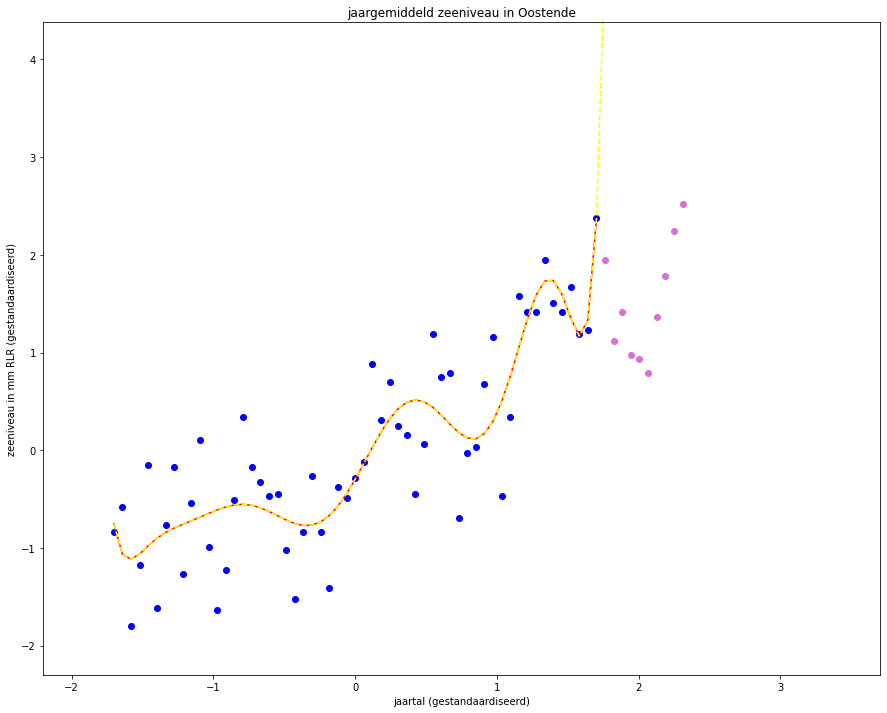

In [34]:
plt.figure(figsize=(15,12))plt.xlim(x_train.min()-0.5, x_train.max()+2)plt.ylim(y_train.min()-0.5, y_train.max()+2)
# point cloud traindataplt.scatter(x_train, y_train, color="blue", marker="o")plt.title("annual average sea level in Ostend")plt.xlabel("year (standardized)")plt.ylabel("sea level in mm RLR (standardized)")
# regression with a tenth-degree curveplt.plot(x_train, y_regressionline_tenthdeg, color="red")plt.plot(x_extra10, y_trendlijn, color="yellow", linestyle="dashed")
# point cloud test dataplt.scatter(x_test, y_test, color="orchid", marker="o")
plt.show()

In [35]:
# comparison of the tenth-degree curveprint("The equation of the tenth degree curve: y =", a10, "x +", b10, "x² +",  \           c10, "x³ +", d10, "x^4 +", e10, "x^5 +", \f10, "x^6 +", g10, "x^7 +", h10, "x^8 +", \i10, "x^9 +", j10, "x^10 +", k10)

De vergelijking van de tiendegraadskromme: y = 0.4769926522804903 x + 0.536800049741373 x² + -3.1634268679128255 x³ + -3.6793231514092715 x^4 + 7.09536782670004 x^5 + 8.533867062025518 x^6 + -6.1238949400833755 x^7 + -7.46971877112639 x^8 + 1.889518069385053 x^9 + 2.581031805721998 x^10 + -0.2984304847237876


In [36]:
print("R² for the tenth degree curve with respect to the training data: %.3f" % r2_score(y_train, y_regressielijn_tiendegr))print("Mean squared deviation for the tenth degree curve with respect to the training data: %.2f"% mean_squared_error(y_train, y_regression_line_tenth_deg))```python
# Average squared deviation for the tenth-degree curve w.r.t the test data: %.2f
print("Average squared deviation for the tenth-degree curve w.r.t the test data: %.2f" % mean_squared_error(y_test, y_predicted))
```

R² voor de tiendegraadskromme  m.b.t. de trainingdata: 0.753
Gemiddelde kwadratische afwijking voor de tiendegraadskromme m.b.t. de trainingdata: 0.25
Gemiddelde kwadratische afwijking voor de tiendegraadskromme  m.b.t. de testdata: 64850.11


**Clear overfitting** with the tenth-degree curve. Scores much, much worse on the test data than on the training data.<br>With more factors taken into account, the better the curve will fit the training data, as demonstrated by the increase in R² (with respect to the training data). Overfitting also takes into account characteristics of the training data that are not relevant.

<div>
    <font color=#690027 markdown="1"> 
        <h2>5. Data from 2018 and 2019</h2>    </font>
</div>

<div>
    <font color=#690027 markdown="1"> 
        <h3>5.1 The measured values</h3>     </font>
</div>

**The measured y-values are respectively 7067 and 7129 mm.**

In [37]:
x_2018 = 2018y_2018 = 2067x_2019 = 2019y_2019 = 7129

In [38]:
# standardizex_2018 = (x_2018 - x_train_gem) / x_train_stdy_2018 = (y_2018 - y_train_gem) / y_train_stdx_2019 = (x_2019 - x_train_gem) / x_train_stdy_2019 = (y_2019 - y_train_gem) / y_train_std

View the forecast according to the straight line, the parabola, and the cubic curve.

<div>
    <font color=#690027 markdown="1"> 
        <h3>5.2 Prediction according to the line</h3>    </font>
</div>

In [41]:
y_2018_regression_line_straight = straight(x_2018, a, b)y_2019_regression_line_straight = straight(x_2019, a, b)
print("Prediction according to line")```python
print("The prediction according to the straight line in 2018 is", y_2018_regression_line_straight)
```print("Prediction according to straight line in 2019 is", y_2019_regressielijn_rechte)
# Undo standardizationzeeniveau_2018 = y_2018_regression_line_straight * y_train_std + y_train_meanzeeniveau_2019 = y_2019_regression_line_straight * y_train_std + y_train_meanprint("Sea level according to trend in 2018 is", zeeniveau_2018, "mm")print("Sea level according to line in 2019 is", zeeniveau_2019 , "mm")

Voorspelling volgens rechte
Voorspelling volgens rechte in 2018 is 1.8828411399977383
Voorspelling volgens rechte in 2019 is 1.9311191179250784
Zeeniveau volgens rechte in 2018 is 7087.3877367736695 mm
Zeeniveau volgens rechte in 2019 is 7089.490796150203 mm


<div>
    <font color=#690027 markdown="1"> 
        <h3>5.3 Prediction according to the parabola</h3>     </font>
</div>

In [43]:
y_2018_regression_line_parabola = parabola(x_2018, a2, b2, c2)y_2019_regressielijn_parabool = parabool(x_2019, a2, b2, c2)
print("Prediction according to parabola")print("Prediction according to parabola in 2018 is", y_2018_regression_line_parabola)print("Prediction according to the parabola in 2019 is", y_2019_regression_line_parabola)
# undo standardizationzeeniveau_2018_parabool = y_2018_regressielijn_parabool *  y_train_std + y_train_gemzeeniveau_2019_parabool = y_2019_regressielijn_parabool * y_train_std + y_train_gemprint("Sea level according to the parabola in 2018 is", zeeniveau_2018_parabool, "mm")print("Sea level according to parabola in 2019 is", zeeniveau_2019_parabool , "mm")

Voorspelling volgens parabool
Voorspelling volgens parabool in 2018 is 3.02878678033703
Voorspelling volgens parabool in 2019 is 3.1494692149984136
Zeeniveau volgens parabool in 2018 is 7137.306806034206 mm
Zeeniveau volgens parabool in 2019 is 7142.5639095147935 mm


<div>
    <font color=#690027 markdown="1"> 
```html
<h3>5.4 Prediction according to the cubic curve</h3>
```    </font>
</div>

In [44]:
y_2018_regressielijn_derdegr = derdegr(x_2018, a3, b3, c3, d3)y_2019_regressielijn_derdegr = derdegr(x_2019, a3, b3, c3, d3)
print("Prediction according to cubic curve")print("Prediction according to third-degree curve in 2018 is", y_2018_regressielijn_derdegr)print("Forecast according to the third-degree curve in 2019 is", y_2019_regressielijn_derdegr)
# undo standardizationzeeniveau_2018_derdegr = y_2018_regressielijn_derdegr *  y_train_std + y_train_gemzeeniveau_2019_thirddegree = y_2019_regressionline_thirddegree *  y_train_std + y_train_meanprint("Sea level according to a third-degree curve in 2018 is", zeeniveau_2018_derdegr, "mm")print("Sea level according to the cubic curve in 2019 is", zeeniveau_2019_derdegr , "mm")

Voorspelling volgens derdegraadskromme
Voorspelling volgens derdegraadskromme in 2018 is 3.3986471760300496
Voorspelling volgens derdegraadskromme in 2019 is 3.5577959739374396
Zeeniveau volgens derdegraadskromme in 2018 is 7153.418466185784 mm
Zeeniveau volgens derdegraadskromme in 2019 is 7160.351220747439 mm


<div>
```html
<h2>References</h2>
```</div>

Flemish Environment Agency (2019). Climate Change. Accessed on January 21, 2020 via <br> &nbsp; &nbsp; &nbsp; &nbsp; https://www.milieurapport.be/milieuthemas/klimaatverandering<br>[2] Frank Deboosere. (2010). Relative to which zero point are altitude measurements for maps made?<br> &nbsp; &nbsp; &nbsp; &nbsp; Consulted on January 21, 2020 via https://www.frankdeboosere.be/vragen/vraag72.php <br>Flemish Environment Agency (2019). Sea level. Consulted on January 21, 2020 via <br> &nbsp; &nbsp; &nbsp; &nbsp; https://www.milieurapport.be/milieuthemas/klimaatverandering/zeeklimaat/zeeniveau/zeeniveau <br>Flemish Environment Agency (2021). Sea level. Consulted on November 12, 2021, via <br> &nbsp; &nbsp; &nbsp; &nbsp;https://www.milieurapport.be/milieuthemas/klimaatverandering/zeeklimaat/zeeniveau

<div>
```html
<h2>With support from</h2>
```</div>

<img src="images/kikssteun.png" alt="Banner" width="800"/>

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook KIKS, see <a href="http://www.aiopschool.be">AI at School</a>, by F. Wyffels & N. Gesquière is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.